In [1]:
import time
start = time.time()

In [2]:
## Importing standard libraries
%pylab inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [4]:
## Importing sklearn libraries

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import preprocessing

In [5]:
## Keras Libraries for Neural Networks

from keras.models import Sequential
from keras.layers import merge
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers.advanced_activations import PReLU
from keras.layers import Convolution2D, Convolution1D, MaxPooling2D
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping

In [6]:
from google.colab import files
uploaded = files.upload()

Saving sample_submission.csv to sample_submission.csv
Saving submission.csv to submission.csv
Saving test.csv to test.csv
Saving train.csv to train.csv


In [9]:
## Read data from the CSV file
parent_data = pd.read_csv('train.csv')
data = parent_data.copy()   
data.pop('id')

0         1
1         2
2         3
3         5
4         6
       ... 
985    1575
986    1578
987    1581
988    1582
989    1584
Name: id, Length: 990, dtype: int64

In [10]:
## read test file
test = pd.read_csv('test.csv')
testId = test.pop('id')

In [11]:
data.head()

,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,0.001953,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,0.000000,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,0.000000,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,0.013672,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,0.000000,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [12]:
## Since the labels are textual, so we encode them categorically
species_label = data.pop('species')
species_label = LabelEncoder().fit(species_label).transform(species_label)
print(species_label.shape)

(990,)


In [13]:
## We will be working with categorical crossentropy function
## It is required to further convert the labels into "one-hot" representation
# from keras import utils as np_utils
one_hot = to_categorical(species_label)
print(one_hot.shape)

(990, 99)


In [14]:
preprocessed_train_data = preprocessing.MinMaxScaler().fit(data).transform(data)
preprocessed_train_data = StandardScaler().fit(data).transform(data)

print(preprocessed_train_data.shape)

(990, 192)


In [15]:
## we need to perform the same transformations from the training set to the test set
test = preprocessing.MinMaxScaler().fit(test).transform(test)
test = StandardScaler().fit(test).transform(test)

In [16]:
sss = StratifiedShuffleSplit(n_splits=10, test_size=0.2,random_state=12345)
train_index, val_index = next(iter(sss.split(preprocessed_train_data, one_hot)))

x_train, x_val = preprocessed_train_data[train_index], preprocessed_train_data[val_index]
y_train, y_val = one_hot[train_index], one_hot[val_index]

print("x_train dim: ",x_train.shape)
print("x_val dim:   ",x_val.shape)

x_train dim:  (792, 192)
x_val dim:    (198, 192)


In [17]:
model = Sequential()

model.add(Dense(768,input_dim=192,  kernel_initializer='glorot_normal', activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(768, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(99, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 768)               148224    
                                                                 
 dropout (Dropout)           (None, 768)               0         
                                                                 
 dense_1 (Dense)             (None, 768)               590592    
                                                                 
 dropout_1 (Dropout)         (None, 768)               0         
                                                                 
 dense_2 (Dense)             (None, 99)                76131     
                                                                 
Total params: 814,947
Trainable params: 814,947
Non-trainable params: 0
_________________________________________________________________


In [18]:
## Adagrad, rmsprop, SGD, Adadelta, Adam, Adamax, Nadam

model.compile(loss='categorical_crossentropy',optimizer='adam', metrics = ["accuracy"])

In [19]:
%%time
early_stopping = EarlyStopping(monitor='val_loss', patience=300)

history = model.fit(x_train, y_train,batch_size=192,epochs=2500 ,verbose=1,
                    validation_data=(x_val, y_val),callbacks=[early_stopping])

Epoch 1/2500
5/5 [==============================] - 2s 121ms/step - loss: 4.4634 - accuracy: 0.0644 - val_loss: 3.3566 - val_accuracy: 0.4495
Epoch 2/2500
5/5 [==============================] - 0s 54ms/step - loss: 3.1960 - accuracy: 0.3649 - val_loss: 2.3948 - val_accuracy: 0.6515
Epoch 3/2500
5/5 [==============================] - 0s 62ms/step - loss: 2.2589 - accuracy: 0.5707 - val_loss: 1.4781 - val_accuracy: 0.8182
Epoch 4/2500
5/5 [==============================] - 0s 51ms/step - loss: 1.4003 - accuracy: 0.7652 - val_loss: 0.8225 - val_accuracy: 0.9343
Epoch 5/2500
5/5 [==============================] - 0s 30ms/step - loss: 0.8861 - accuracy: 0.8396 - val_loss: 0.4781 - val_accuracy: 0.9444
Epoch 6/2500
5/5 [==============================] - 0s 28ms/step - loss: 0.5723 - accuracy: 0.8775 - val_loss: 0.3552 - val_accuracy: 0.9394
Epoch 7/2500
5/5 [==============================] - 0s 30ms/step - loss: 0.4140 - accuracy: 0.9028 - val_loss: 0.2327 - val_accuracy: 0.9495
Epoch 8/2500

In [22]:
## we need to consider the loss for final submission to leaderboard
## print(history.history.keys())
print('val_acc: ',max(history.history['val_accuracy']))
print('val_loss: ',min(history.history['val_loss']))
print('train_acc: ',max(history.history['accuracy']))
print('train_loss: ',min(history.history['loss']))

print()
print("train/val loss ratio: ", min(history.history['loss'])/min(history.history['val_loss']))

val_acc:  1.0
val_loss:  9.648986451793462e-05
train_acc:  1.0
train_loss:  3.973364528064849e-06

train/val loss ratio:  0.041179087025521914


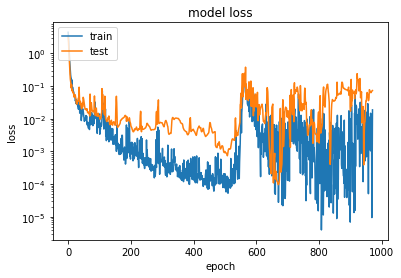

<Figure size 432x288 with 0 Axes>

In [23]:
## summarize history for loss
## Plotting the loss with the number of iterations
plt.semilogy(history.history['loss'])
plt.semilogy(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('model_loss.png')

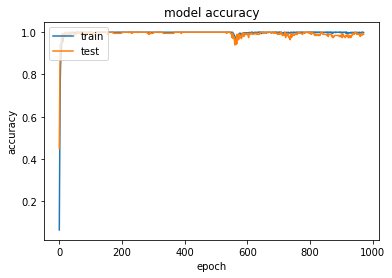

<Figure size 432x288 with 0 Axes>

In [25]:
## Plotting the error with the number of iterations
## With each iteration the error reduces smoothly
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('model_accuracy.png')

In [27]:
yPred = model.predict_on_batch(test)

In [28]:
## Converting the test predictions in a dataframe as depicted by sample submission
submission = pd.DataFrame(yPred,index=testId,columns=sort(parent_data.species.unique()))

In [29]:
submission.to_csv('leafClassificationSubmission.csv')

## print run time
end = time.time()
print(round((end-start),2), "seconds")

663.66 seconds


In [30]:
submission.head()

,Acer_Capillipes,Acer_Circinatum,Acer_Mono,Acer_Opalus,Acer_Palmatum,Acer_Pictum,Acer_Platanoids,Acer_Rubrum,Acer_Rufinerve,Acer_Saccharinum,...,Salix_Fragilis,Salix_Intergra,Sorbus_Aria,Tilia_Oliveri,Tilia_Platyphyllos,Tilia_Tomentosa,Ulmus_Bergmanniana,Viburnum_Tinus,Viburnum_x_Rhytidophylloides,Zelkova_Serrata
id,,,,,,,,,,,,,,,,,,,,,
4,4.092473e-37,3.386535e-36,0.000000e+00,1.672934e-24,2.604318e-33,7.864427e-33,0.000000e+00,7.063540e-34,5.011471e-36,1.437132e-27,...,0.000000e+00,1.943261e-30,5.115846e-31,0.000000e+00,2.899127e-33,0.000000e+00,0.000000e+00,1.020849e-36,1.282338e-21,0.000000e+00
7,1.504205e-28,5.903894e-28,4.376684e-22,6.280200e-22,8.542182e-27,2.861947e-21,2.394966e-18,5.403423e-25,2.556809e-26,4.336205e-20,...,2.618267e-22,2.429652e-22,4.286659e-24,4.219889e-34,4.872248e-32,3.524330e-19,1.000259e-23,4.383158e-18,1.178886e-29,1.918019e-25
9,1.032615e-27,1.000000e+00,8.717108e-29,1.708991e-32,1.062032e-08,9.502768e-15,1.881710e-27,1.564517e-18,4.978282e-20,6.239860e-18,...,4.602972e-24,1.886319e-32,2.807869e-28,6.067184e-30,1.148916e-33,1.751069e-37,1.517326e-31,6.845210e-31,4.082715e-28,4.115232e-16
12,1.608417e-29,5.994011e-13,2.990779e-17,4.401967e-23,1.495622e-22,1.645603e-17,1.692640e-10,8.808478e-18,1.332303e-18,1.419113e-12,...,9.501219e-20,1.287946e-21,2.723486e-19,3.010632e-22,1.235374e-26,2.504730e-17,3.328831e-08,5.080001e-17,3.498894e-26,4.967212e-16
13,6.209962e-26,6.737592e-24,6.275311e-32,3.753407e-27,2.747862e-21,1.931554e-23,2.414441e-19,2.339251e-22,7.174164e-14,8.728636e-18,...,6.334219e-22,7.000607e-27,1.301793e-19,1.086914e-25,1.250288e-14,1.696819e-22,2.133039e-18,1.804862e-23,2.080986e-22,9.336590e-28
